In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.autograd
from torch.autograd import Variable

df_wine = pd.read_csv("data/winequality-red.csv",sep=';')
fields = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

N = len(fields)
degree = 10

features_array = np.array(df_wine[fields[0:11]])
target_array = np.array(df_wine[fields[11]])

features = Variable(torch.from_numpy(features_array).double())
target = Variable(torch.from_numpy(target_array).double())
w = Variable(torch.randn(degree+1).double(), requires_grad=True)

eta = 0.00000003


In [24]:
for epoch in range(1000000):
    ## Compute the forward pass
    f = torch.matmul(features, w)
    #print(f)
    E = torch.sum((target-f)**2)/N

    if epoch%100000 == 0: 
        print(epoch,':',E.item())

    # Compute the gradients by automated differentiation
    E.backward()
    
    # For each adjustable parameter 
    # Move along the negative gradient direction
    w.data.add_(-eta * w.grad.data)
    #print(w.grad.data)
    
    # Reset the gradients, as otherwise they are accumulated in param.grad
    w.grad.zero_()
    
print(epoch,':',E.item(),w)

0 : 56.61278334077283
100000 : 56.61166424594946
200000 : 56.61054654446492
300000 : 56.609430234048
400000 : 56.608315312433696
500000 : 56.607201777362995
600000 : 56.60608962658304
700000 : 56.60497885784691
800000 : 56.60386946891356
900000 : 56.602761457548134
999999 : 56.60165483258089 tensor([ 0.0628, -1.1989, -0.3292,  0.0055, -0.4204,  0.0034, -0.0023,  1.4447,
         0.1954,  0.8015,  0.3161], dtype=torch.float64, requires_grad=True)


[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   8.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   1.  34.  18.   0.   0.   0.   0.]
 [  0.   0.   0.   2. 480. 196.   2.   1.   0.   0.]
 [  0.   0.   0.   0. 193. 419.  26.   0.   0.   0.]
 [  0.   0.   0.   0.   6. 153.  40.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  13.   5.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


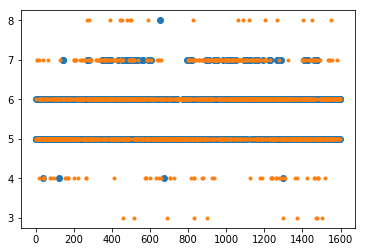

In [32]:
result = torch.matmul(features, w).round()

plt.plot(result.data.numpy().squeeze(),'o')
plt.plot(target.data.numpy().squeeze(),'.')
plt.show

confusion_matrix = np.zeros((10,10))

for i in range(len(result)):
    confusion_matrix[int(target[i] - 1), int(result[i] - 1)] += 1
    
print(confusion_matrix)

In [23]:
accuracy = np.sum(np.diag(confusion_matrix))/np.sum(confusion_matrix)

print("Accuracy:", accuracy*100, "%")

Accuracy: 58.786741713570976 %
